In [1]:
from glob import glob
from natsort import natsorted
from tqdm import tqdm

from YoloKit.Config import PHOTI_CLASS_MAP, LINE_CLASS_MAP
from YoloKit.Utils import is_pagexml_done, process_page, split_dataset, write_yolo_yaml

In [2]:
data_root = "G:/Meine Ablage/TrainingData/Tibetan/TinyYolo/Images"
images_dir = data_root
xml_dir = f"{data_root}/page"

image_files = natsorted(glob(f"{images_dir}/*.jpg"))
xml_files = natsorted(glob(f"{xml_dir}/*.xml"))

print(f"Images: {len(image_files)}")
print(f"XML: {len(xml_files)}")

Images: 57
XML: 57


In [3]:
output_path = "Data/TinyYoloMulticlass"

for img, xml in tqdm(zip(image_files, xml_files), total=len(image_files)):
        if not is_pagexml_done(xml):
            continue
        process_page(xml, img, output_path, classes=PHOTI_CLASS_MAP, debug=False)

split_dataset(output_path)
write_yolo_yaml(output_path, yaml_path=f"{output_path}/dataset.yaml", class_map=PHOTI_CLASS_MAP)

100%|██████████| 57/57 [00:10<00:00,  5.35it/s]


#### Validate Training Data

In [7]:
# debug yolo label
import cv2
import random
from YoloKit.Utils import draw_yolo_seg_labels, show_image

dataset_path = "Data/TinyYoloMulticlass"

train_images = natsorted(glob(f"{dataset_path}/images/train/*.png"))
train_labels = natsorted(glob(f"{dataset_path}/labels/train/*.txt"))

val_images = natsorted(glob(f"{dataset_path}/images/val/*.png"))
val_labels = natsorted(glob(f"{dataset_path}/labels/val/*.txt"))

assert(len(val_images) == len(val_images) and len(val_labels) != 0)

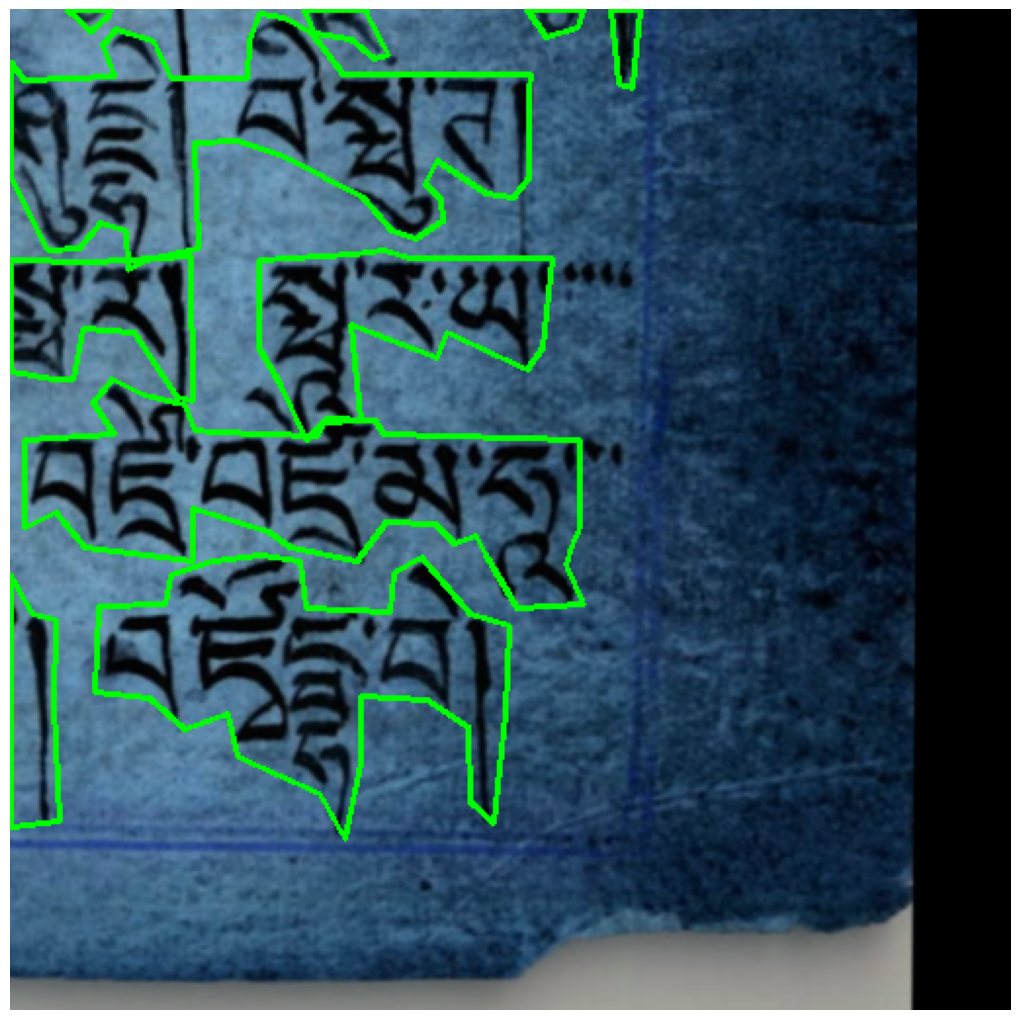

In [6]:
idx = random.randint(0, len(train_images)-1)

tile_img = cv2.imread(train_images[idx])
label_path = train_labels[idx]

dbg = draw_yolo_seg_labels(tile_img, label_path, thickness=2)

show_image(dbg)